# Loading Audio Data & Extracting Features

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pyAudioAnalysis import MidTermFeatures as aF
import os


dirs = ["data/habiba/train", "data/carole/train", "data/rana/train", "data/mohand/train", "data/omar_emad/train/", "data/mirna/train/"]  
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05 

# segment-level feature extraction:
features = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)
    
# (each element of the features list contains a 
# (samples x segment features) = (48 x 138) feature matrix)
print(features[0].shape, features[1].shape, features[2].shape, features[3].shape, features[4].shape, features[5].shape)


Analyzing file 1 of 15: data/habiba/train\1.wav
Analyzing file 2 of 15: data/habiba/train\2.wav
Analyzing file 3 of 15: data/habiba/train\21.wav
Analyzing file 4 of 15: data/habiba/train\22.wav
Analyzing file 5 of 15: data/habiba/train\23.wav
Analyzing file 6 of 15: data/habiba/train\24.wav
Analyzing file 7 of 15: data/habiba/train\25.wav
Analyzing file 8 of 15: data/habiba/train\3.wav
Analyzing file 9 of 15: data/habiba/train\4.wav
Analyzing file 10 of 15: data/habiba/train\41.wav
Analyzing file 11 of 15: data/habiba/train\42.wav
Analyzing file 12 of 15: data/habiba/train\43.wav
Analyzing file 13 of 15: data/habiba/train\44.wav
Analyzing file 14 of 15: data/habiba/train\45.wav
Analyzing file 15 of 15: data/habiba/train\5.wav
Feature extraction complexity ratio: 19.5 x realtime
Analyzing file 1 of 15: data/carole/train\carole1.wav
Analyzing file 2 of 15: data/carole/train\carole2.wav
Analyzing file 3 of 15: data/carole/train\carole21.wav
Analyzing file 4 of 15: data/carole/train\carole

### Visualization of some selected Features

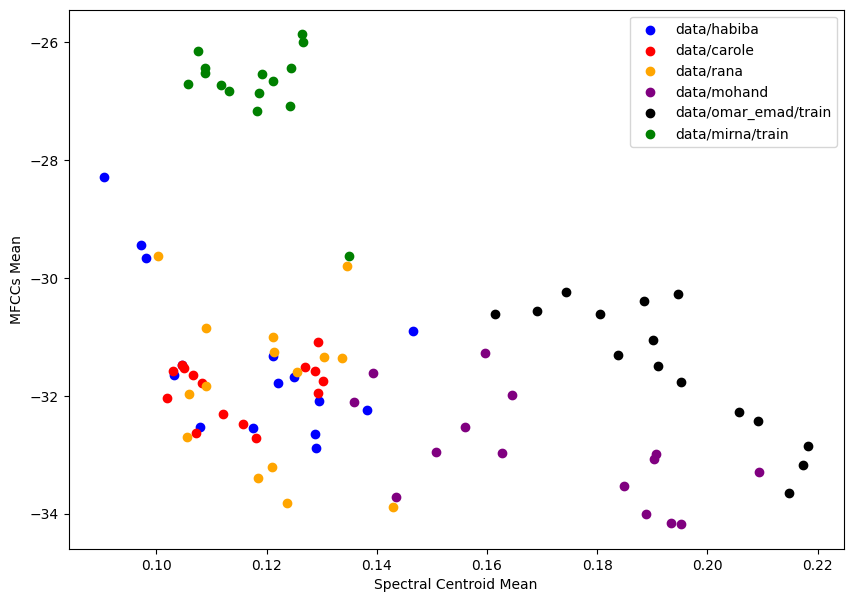

In [5]:
dirs = ["data/habiba/train", "data/carole/train", "data/rana/train", "data/mohand/train", "data/omar_emad/train/", "data/mirna/train/"]
class_names = [os.path.dirname(d) for d in dirs]

f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('mfcc_1_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('mfcc_1_mean')]])
f3 = np.array([features[2][:, fn.index('spectral_centroid_mean')],
               features[2][:, fn.index('mfcc_1_mean')]])
f4 = np.array([features[3][:, fn.index('spectral_centroid_mean')],
               features[3][:, fn.index('mfcc_1_mean')]])
f5 = np.array([features[4][:, fn.index('spectral_centroid_mean')],
               features[4][:, fn.index('mfcc_1_mean')]])
f6 = np.array([features[5][:, fn.index('spectral_centroid_mean')],
               features[5][:, fn.index('mfcc_1_mean')]])

# Check if features were extracted
if f1 is not None and f2 is not None and f3 is not None and f4 is not None:
    # Plot features
    plt.figure(figsize=(10, 7))
    plt.scatter(x=f1[0, :],  y=f1[1, :], 
                    label=class_names[0], color='b')
    plt.scatter(x=f2[0, :], y=f2[1, :], 
                    label=class_names[1], color='r')
    plt.scatter(x=f3[0, :], y=f3[1, :], 
                    label=class_names[2], color='orange')
    plt.scatter(x=f4[0, :], y=f4[1, :], 
                    label=class_names[3], color='purple')
    plt.scatter(x=f5[0, :], y=f5[1, :], 
                    label=class_names[4], color='black')
    plt.scatter(x=f6[0, :], y=f6[1, :], 
                    label=class_names[5], color='g')
    
    plt.xlabel('Spectral Centroid Mean')
    plt.ylabel('MFCCs Mean')
    plt.legend()
    plt.show()
else:
    print("No features were extracted. Please check the directory paths and contents.")

# Training the SVM Model

In [6]:
from pyAudioAnalysis.audioTrainTest import extract_features_and_train

# train the svm classifier
extract_features_and_train(dirs, m_win, m_step, s_win, s_step, "svm_rbf", "svm_model")


Analyzing file 1 of 15: data/habiba/train\1.wav
Analyzing file 2 of 15: data/habiba/train\2.wav
Analyzing file 3 of 15: data/habiba/train\21.wav
Analyzing file 4 of 15: data/habiba/train\22.wav
Analyzing file 5 of 15: data/habiba/train\23.wav
Analyzing file 6 of 15: data/habiba/train\24.wav
Analyzing file 7 of 15: data/habiba/train\25.wav
Analyzing file 8 of 15: data/habiba/train\3.wav
Analyzing file 9 of 15: data/habiba/train\4.wav
Analyzing file 10 of 15: data/habiba/train\41.wav
Analyzing file 11 of 15: data/habiba/train\42.wav
Analyzing file 12 of 15: data/habiba/train\43.wav
Analyzing file 13 of 15: data/habiba/train\44.wav
Analyzing file 14 of 15: data/habiba/train\45.wav
Analyzing file 15 of 15: data/habiba/train\5.wav
Feature extraction complexity ratio: 20.9 x realtime
Analyzing file 1 of 15: data/carole/train\carole1.wav
Analyzing file 2 of 15: data/carole/train\carole2.wav
Analyzing file 3 of 15: data/carole/train\carole21.wav
Analyzing file 4 of 15: data/carole/train\carole

In [7]:
from pyAudioAnalysis import audioTrainTest as aT
dirc = ['data/habiba/test/', 'data/carole/test/', 'data/rana/test/', 'data/mohand/test/', 'data/mirna/test/', 'data/omar_emad/test/']

for d in dirc:
    for filename in os.listdir(d):
        if os.path.isfile(os.path.join(d, filename)):
            print(f'{os.path.join(d, filename)}')
            c, p, p_nam = aT.file_classification(os.path.join(d, filename), "svm_model","svm_rbf")
            print(f'P({p_nam[0]}={p[0]})')
            print(f'P({p_nam[1]}={p[1]})')
            print(f'P({p_nam[2]}={p[2]})')
            print(f'P({p_nam[3]}={p[3]})')
            print(f'P({p_nam[4]}={p[4]})')
            print(f'P({p_nam[5]}={p[5]})')
            print()

data/habiba/test/11.wav
P(data/habiba/train=0.7825177283846644)
P(data/carole/train=0.09764357822785379)
P(data/rana/train=0.05853207709547236)
P(data/mohand/train=0.017030451414585836)
P(data/omar_emad/train/=0.022939422925337006)
P(data/mirna/train/=0.021336741952086385)

data/habiba/test/12.wav
P(data/habiba/train=0.5934011500495918)
P(data/carole/train=0.04190999192879215)
P(data/rana/train=0.26912325906607937)
P(data/mohand/train=0.054739546773835676)
P(data/omar_emad/train/=0.011436936247852353)
P(data/mirna/train/=0.029389115933848936)

data/habiba/test/31.wav
P(data/habiba/train=0.5704224528185432)
P(data/carole/train=0.06255230903409634)
P(data/rana/train=0.236154736149726)
P(data/mohand/train=0.06706479224434275)
P(data/omar_emad/train/=0.039023518011904575)
P(data/mirna/train/=0.024782191741386895)

data/habiba/test/32.wav
P(data/habiba/train=0.6275279885769315)
P(data/carole/train=0.04018500019339751)
P(data/rana/train=0.28260018859241304)
P(data/mohand/train=0.021515810902